In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import dtw as dtw
import common as common

%matplotlib inline

In [2]:
current_dir = os.getcwd()
features_dir = os.path.join(current_dir, '..', 'data', 'features')

print 'Current directory:\t', current_dir
print 'Features directory:\t', features_dir

Current directory:	/Users/martin.majer/PycharmProjects/BP/scripts
Features directory:	/Users/martin.majer/PycharmProjects/BP/scripts/../data/features


In [3]:
data = common.load_features_data(features_dir)

## Custom DTW and R DTW comparison

Path:	[[84, 83], [83, 82], [82, 81], [82, 80], [82, 79]] ... [[4, 3], [3, 2], [2, 1], [1, 1], [0, 0]]
Cost:	3.52409638554


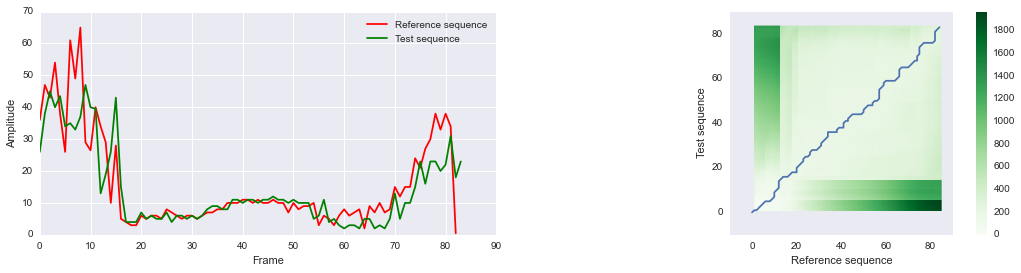

In [5]:
x = data['ste_10_10']['1-1-5.wav']
y = data['ste_10_10']['2-1-5.wav']

cost, cost_matrix = dtw.get_cost(x,y,norm=False)
path = dtw.get_path(cost_matrix)

print 'Path:\t', path[:5], '...', path[-5:]
print 'Cost:\t', cost

plt.figure(figsize=(18, 4))
plt.subplot(1, 2, 1); plt.plot(x, 'r', label='Reference sequence'); plt.plot(y, 'g', label='Test sequence')
plt.xlabel('Frame'); plt.ylabel('Amplitude'); plt.legend()
plt.subplot(1, 2, 2); dtw.plot_matrix(cost_matrix, path)

In [5]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.packages import importr

R = rpy2.robjects.r
DTW = importr('dtw')

alignment = R.dtw(x, y, keep=True, step_pattern=R.symmetric1, method="Euclidean")
R.plot(alignment,type="density") 

dist = alignment.rx('distance')[0][0]
print 'Cost:\t', dist

Cost:	20831647469.0


## Custom distance function

In [6]:
x = data['ste_sti_stzcr_10_10_norm']['1-2-0.wav']
y = data['ste_sti_stzcr_10_10_norm']['1-1-0.wav']

alpha = 0.8
beta = 0.0
gamma = 0.2

dist_func = lambda x, y, i, j: alpha * (np.abs(x[i][0] - y[j][0])) + beta * (np.abs(x[i][1] - y[j][1])) + gamma * (
np.abs(x[i][2] - y[j][2]))

cost = dtw.get_cost(x, y, dist_func, False)[0]
print 'Cost:\t', cost

Cost:	4.06245617165
